In [26]:
#https://www.jobkorea.co.kr/Search/?stext=%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D&focusTab=&focusGno=43641436&tabType=recruit&Page_No=10

#필요한 모듈
import requests 
from bs4 import BeautifulSoup as bs

In [27]:
#url 만들기
base_url = 'https://www.jobkorea.co.kr/Search/?stext=%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D&focusTab=&focusGno=43641436&tabType=recruit&Page_No='

page_no=1
url = f'{base_url}{page_no}' #문자열(url) 과 숫자형(page_no)를 연결처리

url

'https://www.jobkorea.co.kr/Search/?stext=%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D&focusTab=&focusGno=43641436&tabType=recruit&Page_No=1'

In [28]:
resp = requests.get(url)

resp

bs(resp.content, 'html.parser')

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">

<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
</head>
<body>
<br/>
<br/>
<center>
<h2>
회원님께서는 현재 입력할 수 없는 문자열의 사용으로 인해 차단이 되었습니다.<br/>
문제가 지속적으로 발생할 경우 아래 고객센터로 문의하시기 바랍니다.<br/>
이용에 불편을 드려 죄송합니다.<br/>

문의(고객센터): 1588-9350<br/>
<br/>
</h2></center></body>
</html>

In [29]:
headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36"}

resp = requests.get(url, headers = headers)

resp.text

soup = bs(resp.text, 'html.parser')

soup

<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge; chrome=1" http-equiv="X-UA-Compatible"/>
<title>데이터 분석 채용공고 | 총 10642건의 검색결과 - 잡코리아</title>
<meta content="width=1280" name="viewport"/>
<meta content="데이터 분석 채용공고 | 총 10642건의 검색결과 - 잡코리아" name="title"/>
<meta content="데이터 분석 검색결과 총 10642건- 2024 데이터 분석 채용정보가 더 알고 싶다면? 기업정보, 취업정보를 No.1 커리어 플랫폼 잡코리아에서 확인해보세요." name="description"/>
<meta content="데이터 분석, 채용, 구인구직사이트, 취업, 공기업, 직업, 취업박람회, 자소서, 채용사이트, 구직사이트,취업정보사이트, 채용공고, WORK, 직업종류, 커리어, 이직, 공고, 구인, 구직, 헤드헌팅, 경력, 신입, 인턴, 공채, 취업정보, 취업 정보, 취업뉴스, 취업 속보, 취업 뉴스, 취업상담실, 해외취업, 취업센터,채용박람회, 직업적성검사, 면접, 대기업채용, 리쿠르팅, 구인사이트, 잡, 구인광고, 직업추천, 청년일자리, 일자리사이트, 취업지원센터, 리크루팅, 구직자, 채용공고사이트, 인턴십, 일자리박람회, 일자리구하기, 취업성공, 취업사이트, 채용, 채용포털, 채용정보, 고용정보, 알바, 일자리, 구인정보, 이력서, Work, Job, 전직, 재취업, 여성취업, 정보통신취업, IT취업, 임원, CEO, 리쿠르트, 리크루트, 기업, 대기업, 중소기업, 벤처기업, 잡코리아, Jobkorea, wkqzhfldk, 원픽, OnePick, onepick, dnjsvlr, ONE

In [30]:
# 요구 경력 조회
exp_tags = soup.select('span.exp') # '.' 은 클래스

exp_list = []

for tag in exp_tags:
    exp_list.append(tag.text)

exp_list


# 요구학력 조회
edu_tags = soup.select('span.edu')

edu_tags

edu_list = []

for tag in edu_tags:
    edu_list.append(tag.text)

edu_list

['학력무관',
 '초대졸↑',
 '학력무관',
 '대졸↑',
 '대졸↑',
 '학력무관',
 '학력무관',
 '대졸↑',
 '초대졸↑',
 '대졸↑',
 '대졸↑',
 '학력무관',
 '대졸↑',
 '대졸↑',
 '대졸↑',
 '초대졸↑',
 '학력무관',
 '학력무관',
 '학력무관',
 '고졸↑',
 '초대졸↑',
 '학력무관',
 '학력무관',
 '학력무관',
 '학력무관']

In [31]:
# 함수화 시키기: 경력 찾는 함수
def getExp(soup):
    exp_tags = soup.select('span.exp') # '.' 은 클래스

    exp_list = []

    for tag in exp_tags:
        exp_list.append(tag.text)

    return exp_list 


getExp(soup)

# 함수화 시키기: 학력 찾는 함수
def getEdu(soup):
    edu_tags = soup.select('span.edu')

    edu_tags

    edu_list = []

    for tag in edu_tags:
        edu_list.append(tag.text)

    return edu_list

getEdu(soup)

['학력무관',
 '초대졸↑',
 '학력무관',
 '대졸↑',
 '대졸↑',
 '학력무관',
 '학력무관',
 '대졸↑',
 '초대졸↑',
 '대졸↑',
 '대졸↑',
 '학력무관',
 '대졸↑',
 '대졸↑',
 '대졸↑',
 '초대졸↑',
 '학력무관',
 '학력무관',
 '학력무관',
 '고졸↑',
 '초대졸↑',
 '학력무관',
 '학력무관',
 '학력무관',
 '학력무관']

In [32]:
import math

83/20
math.ceil(83/20) #올림 처리해주는 함수 math.ceil()


total_string = soup.select('.dev_tot')[0].text #string 10,871

#replace(): 특정 문자를 내가 원하는 문자로 변경해준다.
total_string = total_string.replace(',', '') #',' 를 빈문자열 '' 로 대체해라

total_page = math.ceil(int(total_string) /20) #544 >> 총 544페이지 (20은 한 페이지에 표출되는 데이터의 개수)

total_page

533

In [33]:
# 함수화 시키기: 총 페이지 수 찾는 함수
def getTotalPage(soup):
    total_string = soup.select('.dev_tot')[0].text #string 10,871

    #replace(): 특정 문자를 내가 원하는 문자로 변경해준다.
    total_string = total_string.replace(',', '') #',' 를 빈문자열 '' 로 대체해라

    total_page = math.ceil(int(total_string) /20) #544 >> 총 544페이지 (20은 한 페이지에 표출되는 데이터의 개수)

    return total_page

getTotalPage(soup)

533

In [34]:
# 필요한 모듈 import
import requests as req
from bs4 import BeautifulSoup as bs
import math

# 기타 준비물
base_url = 'https://www.jobkorea.co.kr/Search/?stext=%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D&focusTab=&focusGno=43641436&tabType=recruit&Page_No='

page_no = 1

url = f'{base_url}{page_no}'
headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36"}


# 경력 조회 함수
def getExp(soup) :
    exp_tags = soup.select('span.exp')
    exp_list = []

    for tag in exp_tags :
        exp_list.append(tag.text)

    return exp_list

# 학력 조회 함수
def getEdu(soup) :
    edu_tags = soup.select('span.edu')
    edu_list = []

    for tag in edu_tags :
        edu_list.append(tag.text)

    return edu_list

# 전체 페이지 조회 함수
def getTotalPage(soup):
    total_string = soup.select('.dev_tot')[0].text
    total_string = total_string.replace(',', '')
    total_page = math.ceil( int(total_string) / 20 )

    return total_page



In [35]:
# 요청 보내기
resp = req.get(url, headers = headers)
html = resp.text

soup = bs(html, 'html.parser')

# 전체 페이지 수 가져오기
getTotalPage(soup)

# 전체 페이지 데이터를 담을 리스트 생성
edu_results = []
exp_results = []

for page in range(10):
    url = f'{base_url}{page_no}'

    resp = req.get(url, headers=headers)
    html = resp.text

    soup = bs(html, 'html.parser')

    edu_list = getEdu(soup)
    exp_list = getExp(soup)

    edu_results += edu_list
    exp_results += exp_list

    page_no += 1



In [36]:
#len() : 배열의 길이
len(edu_results) 
len(exp_results)

300

In [37]:
import pandas as pd

# 요구학력을 시리즈 객체로 변환
s_edu = pd.Series(edu_results)

# 요구경력을 시리즈 객체로 변환
s_exp = pd.Series(exp_results)

# 시리즈 객체가 지원하는 value_counts()를 사용하여 각 항목이 몇 번 등장했는지 구한다 (카테고리별 갯수: .value_counts() )
count_edu = s_edu.value_counts() #Name: count, dtype: int64 // 
count_exp = s_exp.value_counts() #Name: count, dtype: int64

# 데이터의 구조 파악하는거 중요(데이터셋의 타입) : 결과는 시리즈 객체이다.
type(count_edu) #pandas.core.series.Series
type(count_exp) #pandas.core.series.Series

pandas.core.series.Series

In [38]:
# 요구학력 시리즈 객체를 데이터 프레임으로 변경
# 시리즈객체.reset_index() : 기존의 인덱스를 하나의 컬럼으로 변경하여 "데이터프레임"으로 반환한다.
df_edu = count_edu.reset_index()

# 변환된 데이터 프레임의 컬럼명을 재정의(수정)한다.
df_edu.columns = ['요구 학력', '집계'] 
df_edu

# 요구경력
df_exp = count_exp.reset_index()
df_exp.columns = ['요구 경력', '집계']
df_exp

# df 객체를 csv로 저장한다.
df_exp.to_csv('exp.csv', index=False)
df_edu.to_csv('edu.csv', index=False)

In [39]:
# 시각화!
import matplotlib.pyplot as plt

df_edu = pd.read_csv('edu.csv') #한번에 csv 읽어오는 방법
df_edu

df_exp = pd.read_csv('exp.csv')
df_exp

# 정렬하기: 데이터프레임.sort_values(by='정렬기준이 될 컬럼명')
# ignore_index=True: 기존 인덱스를 무시하고 새로운 인덱스 부여
# inplace=True
df_exp.sort_values(by='요구 경력', ignore_index=True, inplace=True)

df_edu = pd.read_csv('edu.csv')
df_edu.sort_values(by='요구 학력', ignore_index=True, inplace=True)

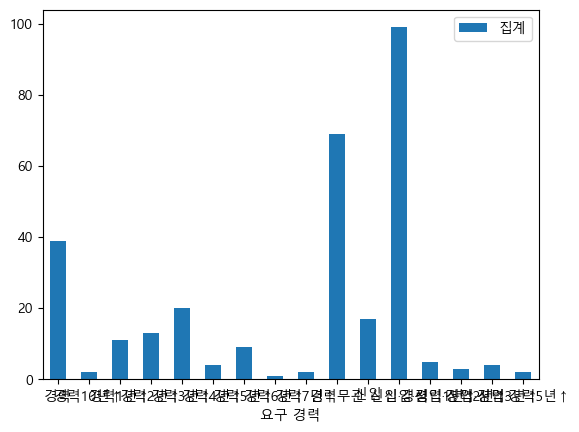

In [40]:
# matplotlib 은 기본적으로 한글을 못 읽는다(에러남) >> 한글 폰트를 직접 적용해야됨

# 한글 폰트 적용하기
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family = font_name) 

df_exp.plot(kind='bar', x='요구 경력', y='집계')

plt.xticks(rotation=0)

plt.show()

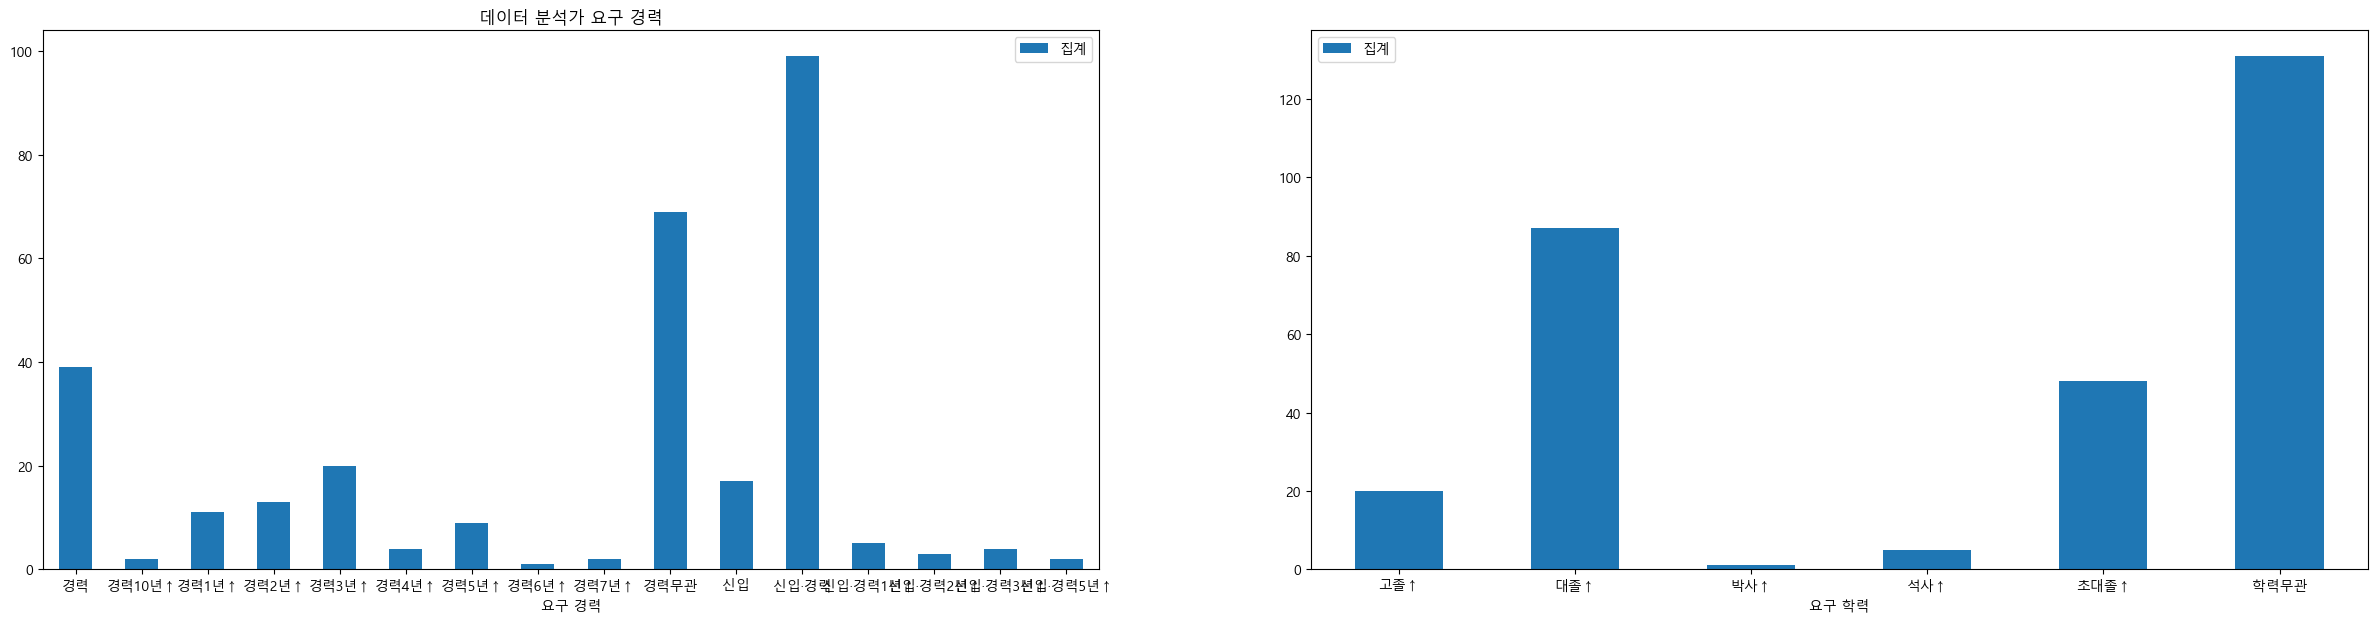

In [44]:

# figure() : figure를 생성한다. (큰 도화지를 만든다)
# figsize=(30, 7): 도화지의 크기를 설정
figure = plt.figure(figsize=(30, 7))


# figure.add_subplot(행, 열, 순서): 서브 플롯을 추가한다. (큰 도화지에 그래프가 들어갈 작은 공간을 추가한다)
# (1, 2, 1): 1행 2열 중에 1번째 공간
ax1 = figure.add_subplot(1, 2, 1)
ax2 = figure.add_subplot(1, 2, 2)


df_exp.plot(kind='bar', x='요구 경력', y='집계', ax=ax1)
df_edu.plot(kind='bar', x='요구 학력', y='집계', ax=ax2)

ax1.tick_params(axis='x', rotation=0)
ax2.tick_params(axis='x', rotation=0)

# 타이틀 설정
ax1.set_title('데이터 분석가 요구 경력')

plt.savefig('my_graph.png')

plt.show() #제일 마지막에 써줘야 함 (저장 시 초기화 되버리기 때문에)



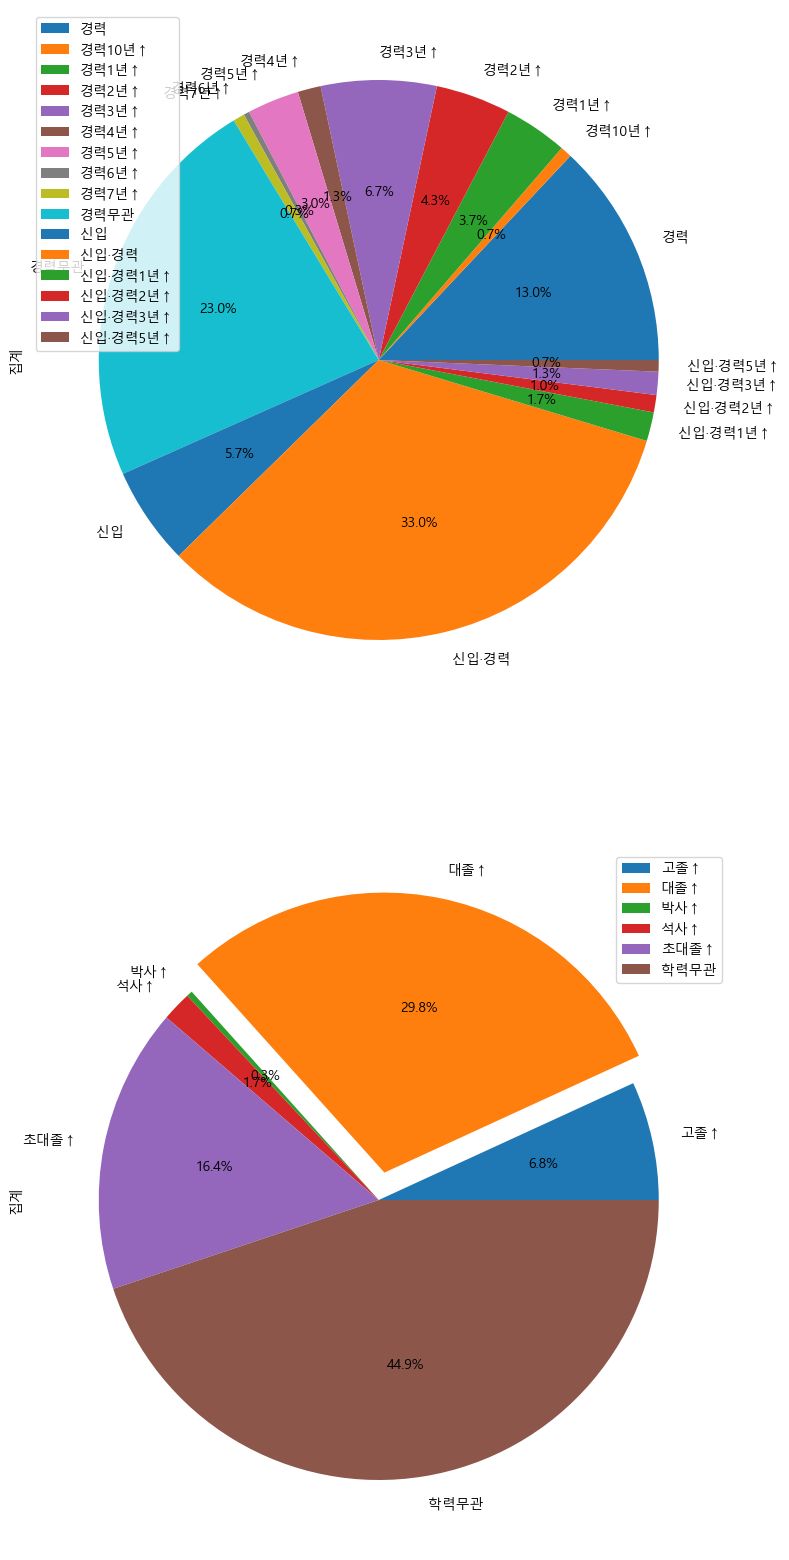

In [51]:
# 원형 그래프로 시각화
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# y: y축 설정
# labels: 각 파이에 들어갈 데이터 라벨을 지정
# autopct: 원형 차트의 조각에 백분율을 어떻게 표시할지 결정
# %.1f%% : %1.f (소수점 한 자리로 표시), %% (% 문자열을 끝에 붙힘)
df_exp.plot(kind = 'pie', y='집계', labels=df_exp['요구 경력'], autopct='%.1f%%', ax=ax1)

# 특정 항목을 강조하기 위해 중심으로부터 띄워놓을 때: explode = [] , 강조하고싶은 항목의 index에 0.1 등의 실수 입력
df_edu.plot(kind = 'pie', y='집계', labels=df_edu['요구 학력'], autopct='%.1f%%', ax=ax2, explode=[0, 0.1, 0, 0, 0, 0])

plt.savefig('pie_graph.png')

plt.show()

In [52]:
# 워드 클라우드: 데이터를 시각화하는 방식 중 하나. 많은 단어일 수록 해당 글자가 강조됨. 자연어 분석할 때 많이 사용
!pip install wordcloud


   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---------- ----------------------------- 81.9/301.4 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 6.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


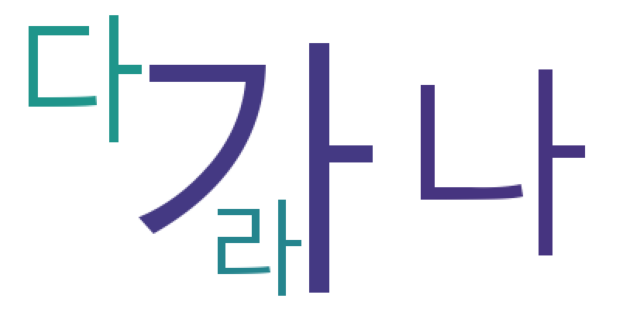

In [63]:
from wordcloud import WordCloud

# 한글 폰트 적용하기
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family = font_name) 

test = '가 나 다 라 가 가 나 가 다'

wordcloud_test = WordCloud(font_path = font_path,
        background_color = 'white').generate(test)

plt.figure(figsize=(8, 8))

plt.imshow(wordcloud_test)


# x축, y축을 표시하지 않는다.
plt.axis('off')

plt.show()

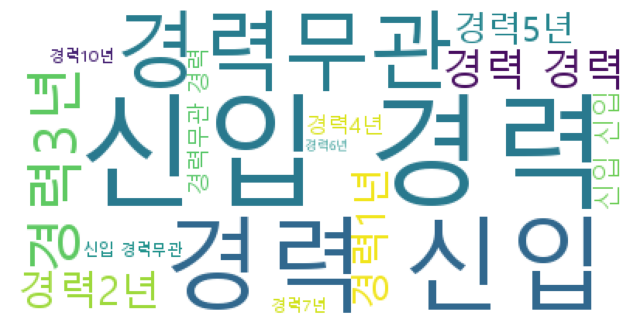

In [76]:
# esc + b : 다음 셀 생성
# esc + a : 이전 부분에 셀 생성

#워드 클라우드는 분석대상이 문자열 1개이다.
# 문자열은 데이터들을 띄어쓰기(' ')로 구분하여 저장되어 있어야 한다.
# 중복되는 단어가 많을수록 해당 단어가 크게 표시된다.

# 리스트
exp_results
edu_results

# ' ', join(리스트객체): 리스트의 각 요소들을 하나의 문자열로 만들어준다.
#   이 때 각 요소는 ' '를 구분자로 사용한다.
# 파이썬 기본 문법 중에 알아두면 좋음
exp_str = ' '.join(exp_results)
exp_str

edu_str=' '.join(edu_results)
edu_str

wordcloud = WordCloud(font_path = font_path, background_color='white').generate(exp_str)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('wordcloud.png')
plt.show()


'''
1. conda remove pathlib / 2. pip show pathlib / 3. pip uninstall pathlib
'''